In [1]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

1)	A partir da imagem original obtenha as outras imagens conforme descrição

Desejamos separar linhas de círculos. Uma operação de abertura com um elemento estruturante na forma de círculo (definir o raio) faz essa tarefa.


In [21]:
def generate_circle(r):
    A = np.arange(-r,r+1)**2
    # print(A)
    dists = np.sqrt(A[:,None] + A)
    # print(A[:,None])
    # print((dists-r))
    return (dists<=r).astype(int)

def erode(img, element, origin_x, origin_y):
    response = np.zeros(img.shape)

    h, w = img.shape
    eh, ew = element.shape

    left_padding = origin_x
    top_padding = origin_y
    right_padding = ew - origin_x - 1
    bottom_padding = eh - origin_y - 1

    for col in range(w):
        for row in range(h):
            if col - left_padding < 0 or row - top_padding < 0 or col + right_padding > w or row + bottom_padding > h:
                response[row, col] = 0
            else:
                inconsistent = False
                temp_row = row - top_padding
                temp_col = col - left_padding

                for el_col in range(ew):
                    for el_row in range(eh):
                        if element[el_row, el_col] == 1 and img[temp_row + el_row - 1, temp_col + el_col -1] == 0:
                            inconsistent = True
                            break
                
                    if inconsistent: break

                if not inconsistent:
                    response[row, col] = 255
                else:
                    response[row, col] = 0

    return response

def dilate(img, element, origin_x, origin_y):
    response = np.zeros(img.shape)

    h, w = img.shape
    eh, ew = element.shape

    left_padding = origin_x
    top_padding = origin_y

    for col in range(w):
        for row in range(h):
            if img[row, col] > 0:
                temp_row = row - top_padding
                temp_col = col - left_padding
                
                for el_col in range(ew):
                    for el_row in range(eh):
                        if element[el_row, el_col] == 1 and (temp_row + el_row - 1) >= 0 and (temp_col + el_col -1) >= 0:
                            response[(temp_row + el_row - 1), (temp_col + el_col -1)] = 255

    return response

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]


Text(0.5, 1.0, 'Dilatada')

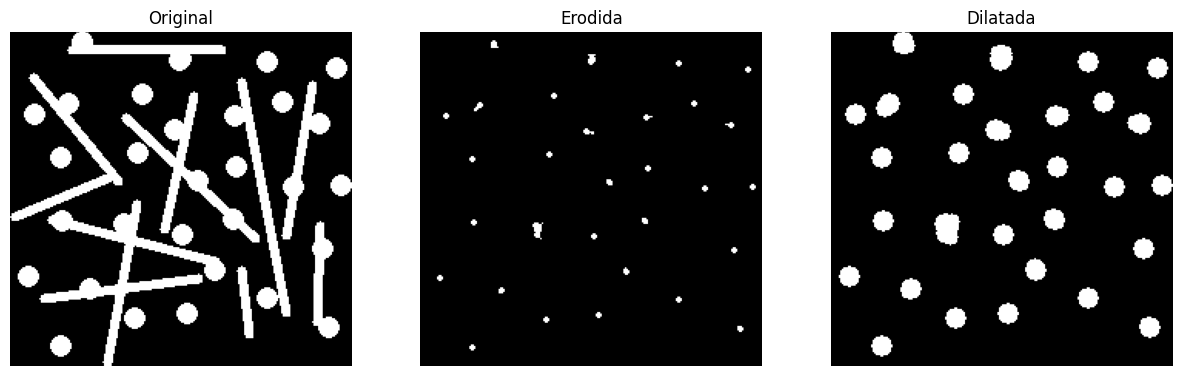

In [22]:
img1 = cv2.imread("art3.png", cv2.IMREAD_GRAYSCALE)

radius = 5

print(generate_circle(radius))

eroded = erode(img1, generate_circle(radius), radius, radius)
dilated = dilate(eroded, generate_circle(radius), radius, radius)

fig = plt.figure(figsize=(15, 45))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, columns, 2)
plt.imshow(eroded, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Erodida")

fig.add_subplot(rows, columns, 3)
plt.imshow(dilated, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Dilatada")

2)

a) Obter linhas verticais. Abertura com elemento estruturante vertical 3x9

In [23]:
vertical_element = np.array([[1] * 3] * 9)
horizontal_element = np.array([[1] * 15] * 3)

img2 = cv2.imread("art2.png", cv2.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'Dilatada')

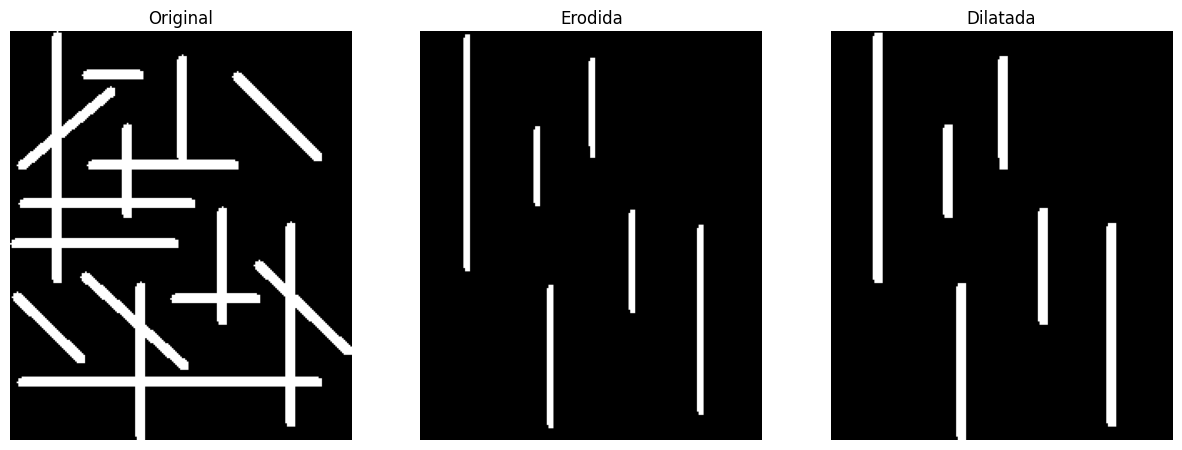

In [24]:
eroded = erode(img2, vertical_element, 0, 0)
dilated = dilate(eroded, vertical_element, 0, 0)

fig = plt.figure(figsize=(15, 45))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, columns, 2)
plt.imshow(eroded, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Erodida")

fig.add_subplot(rows, columns, 3)
plt.imshow(dilated, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Dilatada")

b) Obter linhas horizontais. Abertura com elemento estruturante horizontal 9x3. Tente eliminar as linhas erradas usando uma máscara maior

Text(0.5, 1.0, 'Dilatada')

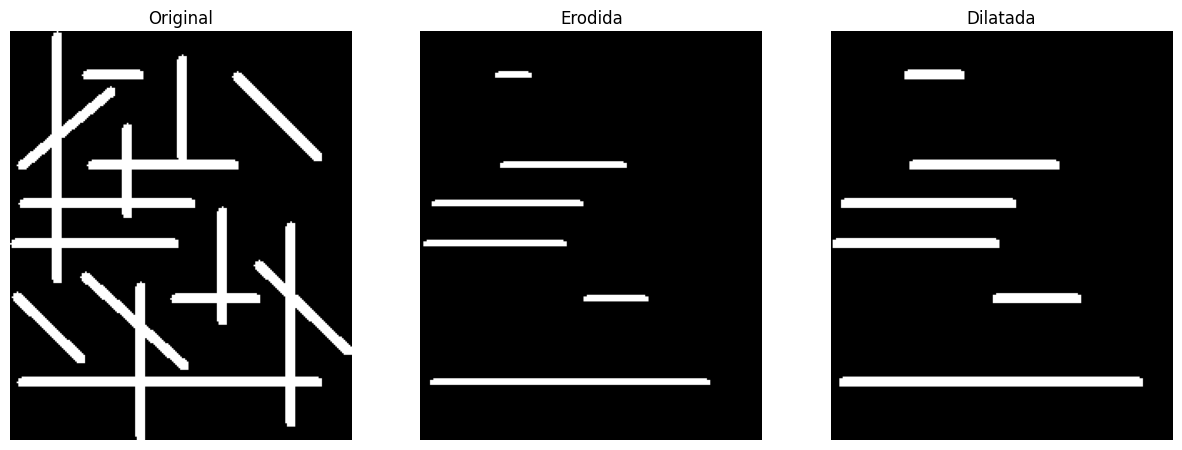

In [25]:
eroded = erode(img2, horizontal_element, 0, 0)
dilated = dilate(eroded, horizontal_element, 0, 0)

fig = plt.figure(figsize=(15, 45))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, columns, 2)
plt.imshow(eroded, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Erodida")

fig.add_subplot(rows, columns, 3)
plt.imshow(dilated, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Dilatada")

3)

a) Theshold (t=210)

Text(0.5, 1.0, 'Binária')

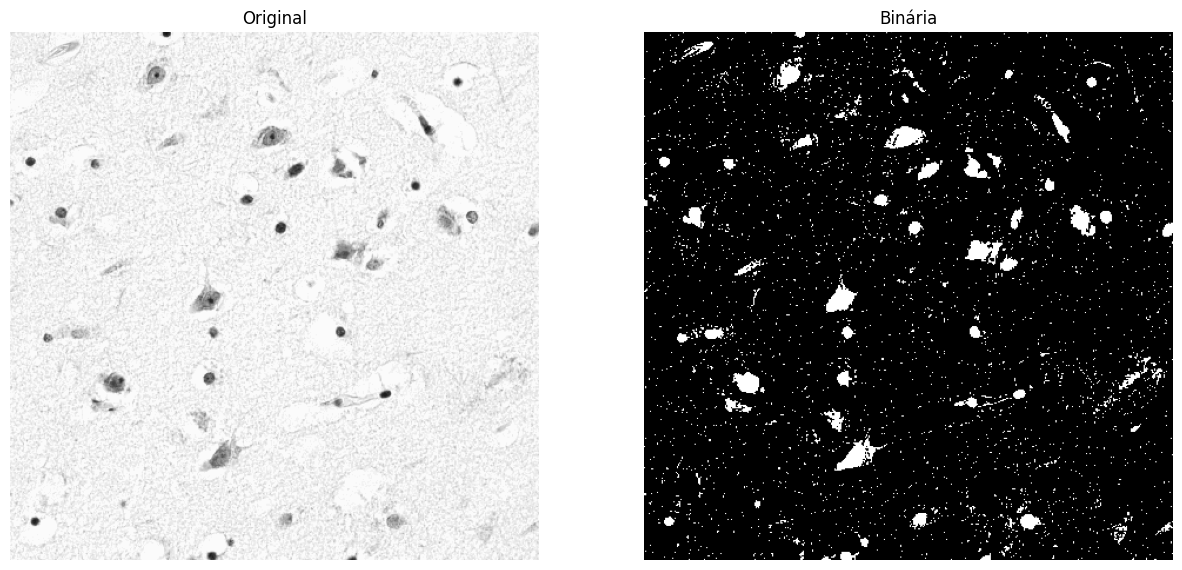

In [26]:
img3 = cv2.imread("cel4.png", cv2.IMREAD_GRAYSCALE)
threshold = 210

h, w = img3.shape
img_binary = np.zeros(img3.shape)

for col in range(w):
    for row in range(h):
        if img3[row, col] >= threshold: img_binary[row, col] = 0
        else: img_binary[row, col] = 255

fig = plt.figure(figsize=(15, 45))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, columns, 2)
plt.imshow(img_binary, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Binária")

b) Utilizando abertura com elemento circular de 11 pixels para reter as células grandes

Text(0.5, 1.0, 'Dilatada')

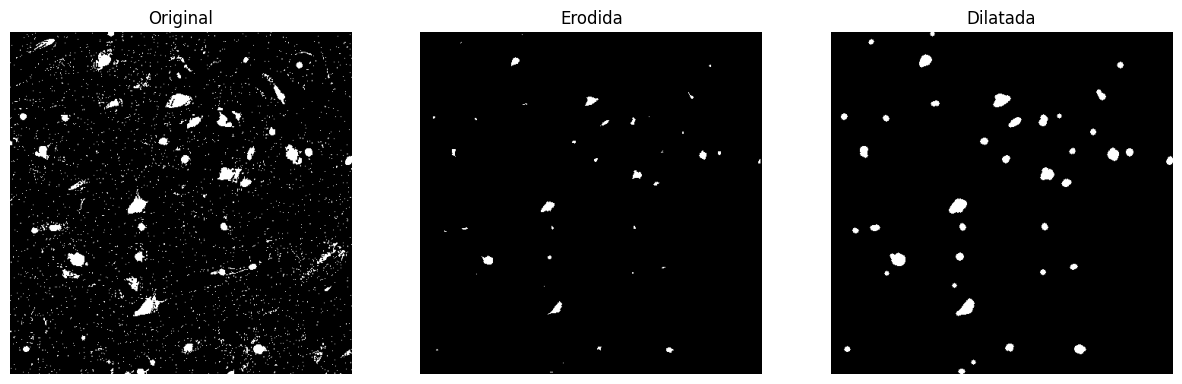

In [27]:
radius = 3

eroded = erode(img_binary, generate_circle(radius), radius, radius)
dilated = dilate(eroded, generate_circle(radius), radius, radius)

fig = plt.figure(figsize=(15, 45))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(img_binary, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, columns, 2)
plt.imshow(eroded, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Erodida")

fig.add_subplot(rows, columns, 3)
plt.imshow(dilated, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Dilatada")

c) É possível reter somente os objetos pequenos utilizando a operação abertura?

Não é possível, visto uma operação de erosão em um elemento pequeno não iria filtrar elementos grandes na maioria dos casos, deixando resíduos que serão dilatados na segunda etapa da operação de abertura

4)
Utilizando os conceitos já aprendidos na disciplina, faça um código que calcula a quantidade de objetos da imagem abaixo. Pode-se utilizar funções prontas do opencv (não para realizar a contagem em si, mas para realizar os passos necessários)

Text(0.5, 1.0, 'Binária')

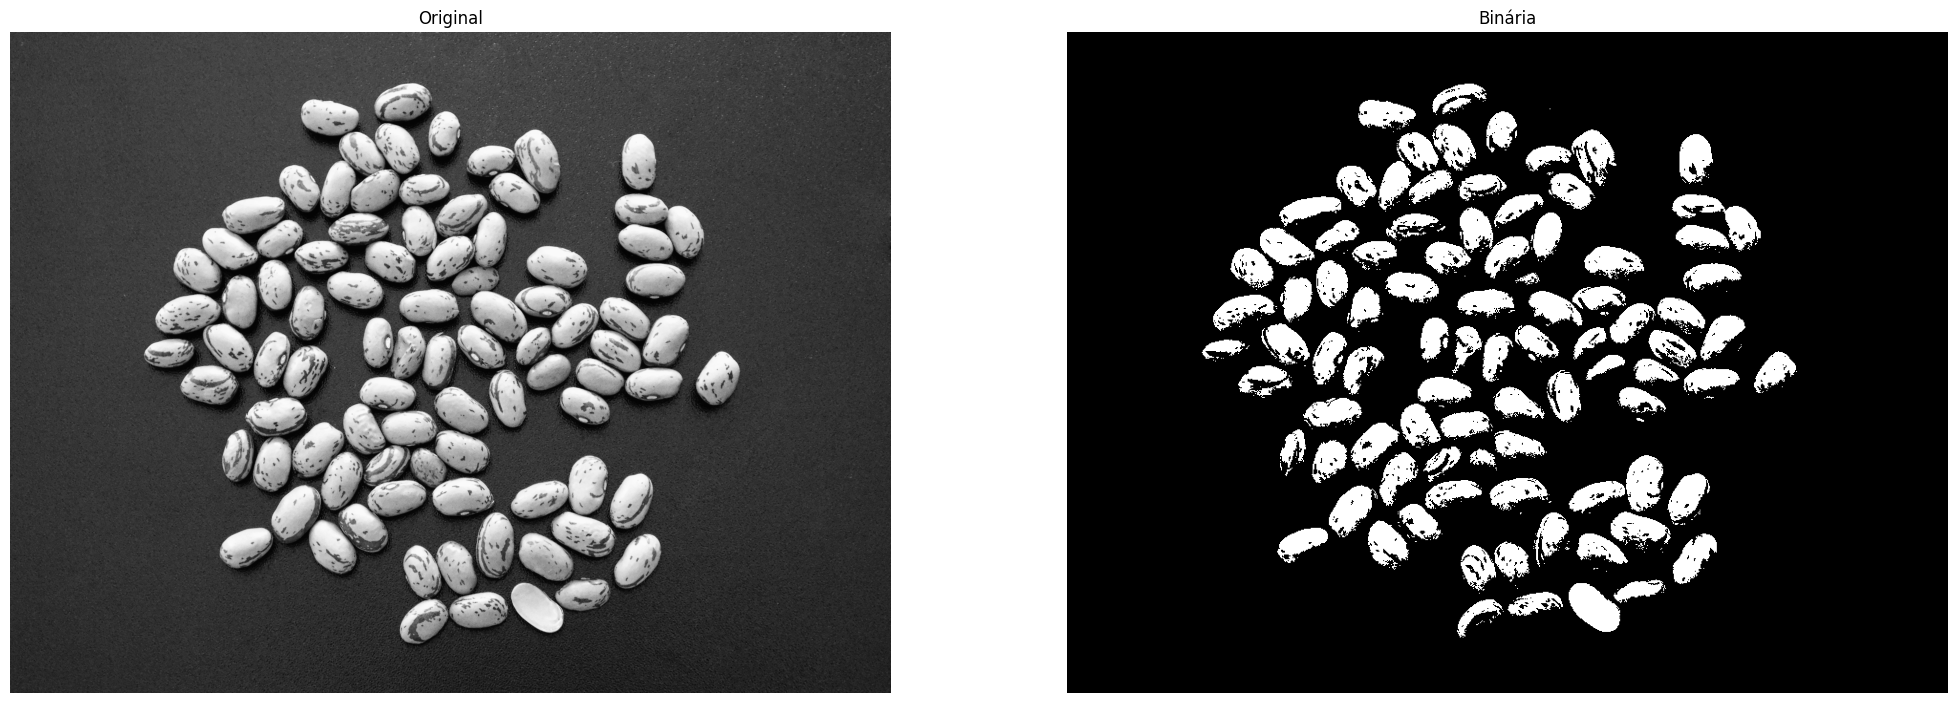

In [28]:
img4 = cv2.imread("feijao.jpg", cv2.IMREAD_GRAYSCALE)

threshold = 170

img_scaled4 = img4[::5, ::5]

img_binary4 = (img_scaled4 >= threshold) * 255

fig = plt.figure(figsize=(25, 45))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(img4, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, columns, 2)
plt.imshow(img_binary4, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Binária")

Text(0.5, 1.0, 'Step 4')

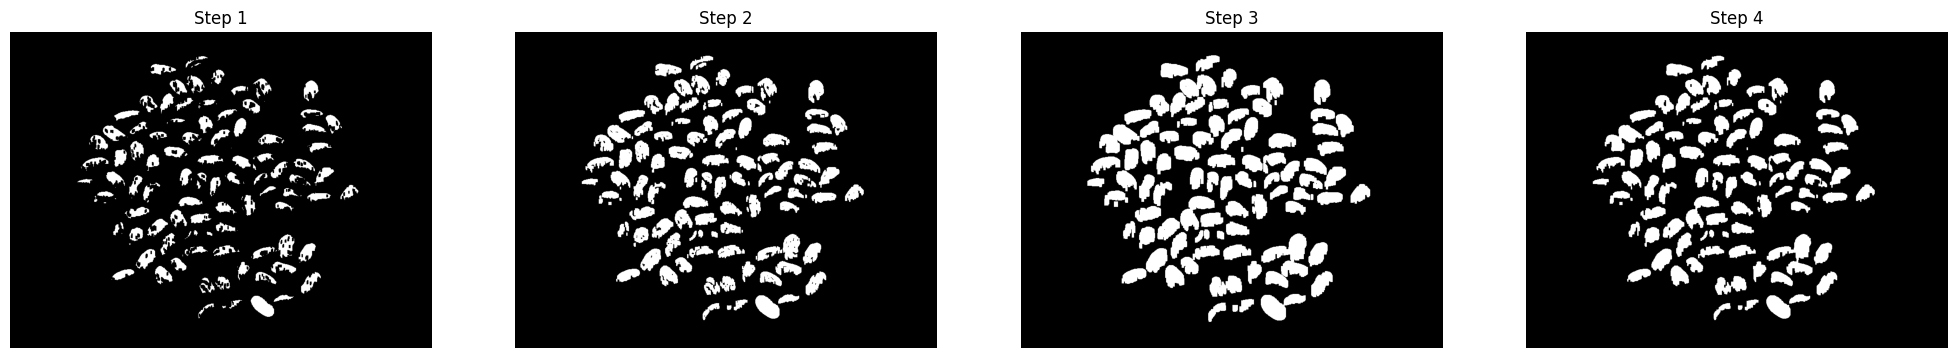

In [29]:
radius = 5
element = np.array([[1] * 3] * 6)

circle = generate_circle(radius)

# step1 = erode(img_binary4, circle, radius, radius)
# step2 = dilate(step1, circle, radius, radius)
# step3 = dilate(step2, circle, radius, radius)
# step4 = erode(step3, circle, radius, radius)

step1 = erode(img_binary4, element, 0, 0)
step2 = dilate(step1, element, 0, 0)
step3 = dilate(step2, element, 0, 0)
step4 = erode(step3, element, 0, 0)

fig = plt.figure(figsize=(25, 45))
rows = 1
columns = 4

fig.add_subplot(rows, columns, 1)
plt.imshow(step1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Step 1")

fig.add_subplot(rows, columns, 2)
plt.imshow(step2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Step 2")

fig.add_subplot(rows, columns, 3)
plt.imshow(step3, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Step 3")

fig.add_subplot(rows, columns, 4)
plt.imshow(step4, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Step 4")

In [30]:
def getSmaller(list):
    smaller = list[0]

    for x in range(1, len(list)):
        if list[x] < smaller: smaller = list[x]

    return smaller

labels = [[0 for _ in range(len(step4[0]))] for _ in range(len(step4))]
labelCount = 1
neighbourLabels = []
labelDictionary = {}

# labeling the image
for x in range(len(step4)):
    for y in range(len(step4[x])):
        neighbourLabels = []

        if step4[x][y] > 0:
            # if all neighbours are below the threshold
            if (y == 0 or step4[x][y - 1] == 0) and (x == 0 or step4[x - 1][y] == 0) and ((x == 0 or y == 0) or step4[x - 1][y - 1] == 0) and ((x == 0 or y == len(step4[x]) - 1) or step4[x - 1][y + 1] == 0): 
                labels[x][y] = labelCount
                labelCount += 1
            else: # if at least one neighbour is above the the threshold
                if y > 0 and labels[x][y - 1] > 0: 
                    neighbourLabels.append(labels[x][y - 1])
                if x > 0 and labels[x - 1][y] > 0:
                    neighbourLabels.append(labels[x - 1][y])
                if (x > 0 and y > 0) and labels[x - 1][y - 1] > 0:
                    neighbourLabels.append(labels[x - 1][y - 1])
                if (x > 0 and y < (len(step4[x]) - 1)) and labels[x - 1][y + 1] > 0:
                    neighbourLabels.append(labels[x - 1][y + 1])

                # if only one neighbour is above the threshold
                if len(neighbourLabels) == 1: labels[x][y] = neighbourLabels[0]
                elif len(neighbourLabels) > 1: # if more than one neighbour ia above the threshold
                    smaller = getSmaller(neighbourLabels)
                    labels[x][y] = smaller

                    # Assigning the neighbours labels to the lowest label between the neighbours
                    for u in range(len(neighbourLabels)):
                        if neighbourLabels[u] not in labelDictionary and neighbourLabels[u] != smaller: labelDictionary[neighbourLabels[u]] = smaller

labelDictionary = dict(sorted(labelDictionary.items(), reverse=True))

# Replacing equivalent labels
for label in labelDictionary:
    for a in range(len(labels)):
        for b in range(len(labels[a])):
            if labels[a][b] == label: labels[a][b] = labelDictionary[label]

# Getting the different label values from the labeled image
values = list(set(i for j in labels for i in j))
values.remove(0)

print("Utilizando a vizinhança de 8, existem aproximadamente " + str(len(values)) + " objetos na imagem")

Utilizando a vizinhança de 8, existem aproximadamente 92 objetos na imagem
